# Top fútbol league analysis
# by Hermon Tesfatsion

# Contents 
- Introduction
- Map
- Data Cleaning
- Data Analysis(heatmap, goal difference, wins, point difference)
- Conclusion

# Introduction
With the 2022 World Cup currently going on, we decided to do an analysis on the top fútbol leagues. For our analysis, we will focus on the Big 5 European fútbol leagues - the Premier League, La Liga, Bundesliga, Serie A, and Ligue 1. These leagues are widely recognized as being among the most competitive and prestigious in Europe, and they attract many of the world's top players and teams.

The dataset we will use for our analysis includes team statistics for from the 2010-2011 to 2020-2021 season for all teams in the top 5 European leagues. The data is organized into several columns, including league, season, points, games played, wins, draws, losses, goals scored, goals conceded, and goal difference.

It can be challenging to determine which of the top 5 leagues is the most competitive based on just watching the games. In this tutorial, we will analyze the data to try to answer the question of which league is the most competitive.




# Map of the 5 leagues
We will map the top 5 leagues from Europe below.

We begin by importing the relevant libraries and move on to inputting the latitude and longitude of each country. 
England: orange, German: red, France: blue, Spain: green, Italy: black

In [906]:
import folium
import requests

map_osm = folium.Map(location=[46.2276, 2.2137], zoom_start=4.5)
folium.Marker(location=[51.1657, 10.4515],
                      icon=folium.Icon(color='red')).add_to(map_osm)
folium.Marker(location=[46.2276, 4.17],
                      icon=folium.Icon(color='blue')).add_to(map_osm)
folium.Marker(location=[52.3555, -1.3],
                      icon=folium.Icon(color='orange')).add_to(map_osm)
folium.Marker(location=[41.555097, -1.4],
                      icon=folium.Icon(color='green')).add_to(map_osm)
folium.Marker(location=[43.4719, 11.9],
                      icon=folium.Icon(color='black')).add_to(map_osm)
map_osm

# Data Collection

In [907]:
# importing required libraries and tools
import pandas as pd
import matplotlib.pyplot as plts
import seaborn as sns
import numpy as np

In [908]:
topLeagues = pd.read_csv("leagues.csv")
topLeagues

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_complete,games_subs,unused_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,3.0,139,102,15,218,418,NaN,99,NaN,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,...,1.0,148,115,15,241,418,NaN,107,NaN,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,...,5.0,153,120,18,182,418,NaN,102,NaN,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,...,6.0,150,106,13,243,418,NaN,107,NaN,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,...,2.0,183,137,8,202,418,NaN,96,NaN,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,La Liga,2020-2021,16,Alavés,38,9,11,18,36,57,...,8.0,143,87,9,99,418,248.0,163,254.0,1.00
1074,La Liga,2020-2021,17,Elche,38,8,12,18,34,55,...,3.0,156,107,7,87,418,267.0,152,298.0,0.95
1075,La Liga,2020-2021,18,Huesca,38,7,13,18,34,53,...,2.0,142,94,9,130,418,246.0,171,215.0,0.89
1076,La Liga,2020-2021,19,Valladolid,38,5,16,17,34,57,...,4.0,155,102,3,110,418,246.0,170,246.0,0.82


# Data Cleaning 
We will look through the data frame for columns with missing values and decide whether we want to keep or remove those columns based on whether we plan to use the data contained in those columns for our analysis. We will also remove any other columns that are not relevant or useful for our analysis.

In [909]:
# number of missing data in each columns 
missingValues = topLeagues.isnull().sum()
missingValues

competition                  0
season                       0
rank                         0
squad                        0
games                        0
wins                         0
draws                        0
losses                       0
goals_for                    0
goals_against                0
goal_diff                    0
points                       0
notes                      628
players_used                 0
assists                      0
pens_made                    0
pens_att                     0
cards_yellow                93
cards_red                   93
shots_on_target_against      0
saves                        0
clean_sheets                 0
shots_on_target              0
games_starts                 0
games_complete             920
games_subs                   0
unused_subs                392
points_per_match             0
dtype: int64

In our dataframe, there are five columns that have multiple missing values. The column for "games_complete" has the most missing values, with 920. The column for "notes" has the second most missing values, with 628. The column for "unused_subs" has the third most missing values, with 392. The columns for "cards_yellow" and "cards_red" both have 93 missing values.

In [910]:
# drop columsn with missing values 
topLeagues = topLeagues.drop(columns = ['notes','players_used','cards_yellow','cards_red','games_complete','unused_subs'])

# drop some datas that are useless to us. 
topLeagues = topLeagues.drop(columns = ['assists','saves','clean_sheets','games_starts','pens_made','pens_att','shots_on_target_against'])

topLeagues


,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,goal_diff,points,shots_on_target,games_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,41,80,218,99,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,36,71,241,107,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,27,71,182,102,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,29,68,243,107,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,9,62,202,96,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,La Liga,2020-2021,16,Alavés,38,9,11,18,36,57,-21,38,99,163,1.00
1074,La Liga,2020-2021,17,Elche,38,8,12,18,34,55,-21,36,87,152,0.95
1075,La Liga,2020-2021,18,Huesca,38,7,13,18,34,53,-19,34,130,171,0.89
1076,La Liga,2020-2021,19,Valladolid,38,5,16,17,34,57,-23,31,110,170,0.82


We check to see if there are any missing values left below

In [911]:
topLeagues.isnull().sum()

competition         0
season              0
rank                0
squad               0
games               0
wins                0
draws               0
losses              0
goals_for           0
goals_against       0
goal_diff           0
points              0
shots_on_target     0
games_subs          0
points_per_match    0
dtype: int64

The following code creates the correlation matrix between all the features we are going to be analyzing. 



/var/folders/ww/3llrwfk521ndd41452qvnyy00000gn/T/ipykernel_1300/3875490569.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(topLeagues.corr(), annot=True).set_title('Correlation Heatmap')


Text(0.5, 1.0, 'Correlation Heatmap')

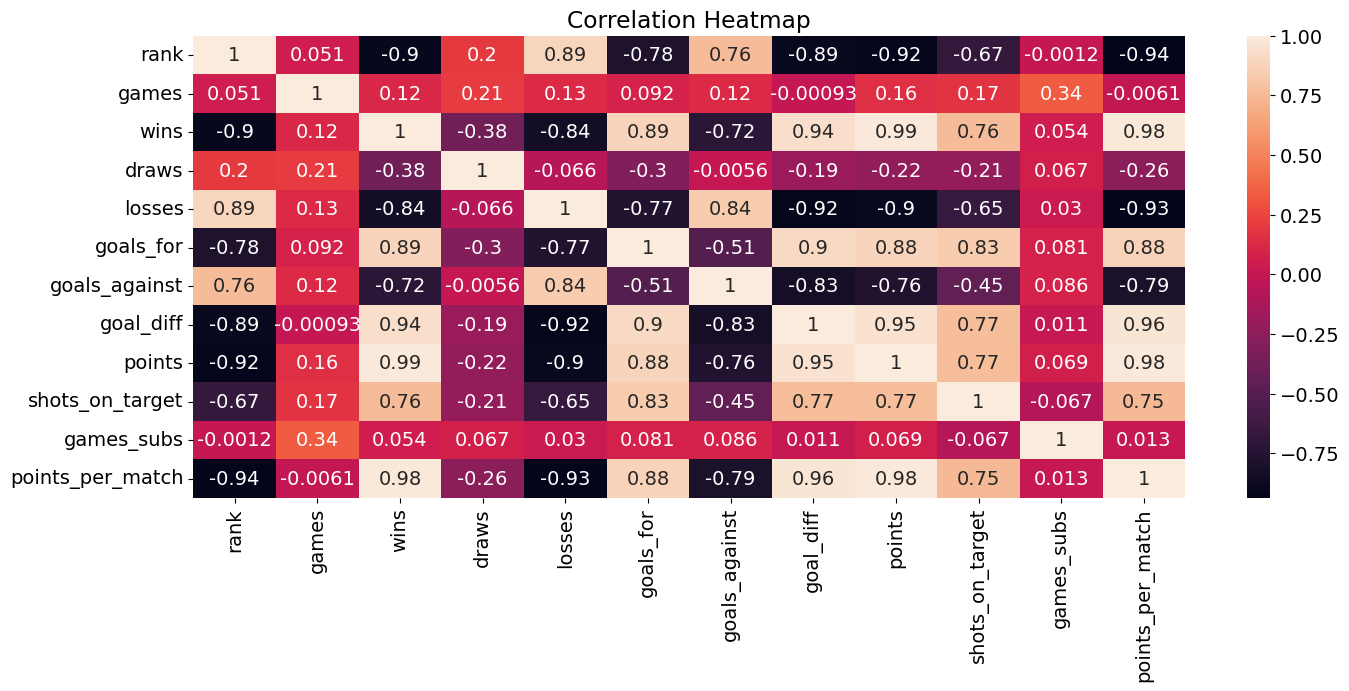

In [912]:
plts.figure(figsize=(16, 6))

sns.heatmap(topLeagues.corr(), annot=True).set_title('Correlation Heatmap')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
# heatmap.set_title('Correlation Heatmap')

By looking at this heat map, we can get a sense of how strong the correlation is between the different variables from our dataframe.  Stronger correlation is lighter, while weaker correlation has darker shades. Some of the variables we will explore below such as goal difference, points, wins, and rank for reach league tend to have some correlation.


# Data Analysis
#### The goal difference for top 10 teams in each league

We create new dataframe with the top 10 clubs for every season.


In [913]:
top10 = topLeagues.loc[(topLeagues['rank'] >= 1) & (topLeagues['rank'] <= 10)]
top10

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,goal_diff,points,shots_on_target,games_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,41,80,218,99,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,36,71,241,107,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,27,71,182,102,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,29,68,243,107,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,9,62,202,96,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,La Liga,2020-2021,6,Betis,38,17,10,11,50,50,0,61,144,155,1.61
1064,La Liga,2020-2021,7,Villarreal,38,15,13,10,60,44,16,58,149,165,1.53
1065,La Liga,2020-2021,8,Celta Vigo,38,14,11,13,55,57,-2,53,137,137,1.39
1066,La Liga,2020-2021,9,Granada,38,13,7,18,47,65,-18,46,123,176,1.21


Gets the sum of goal difference for each league. Then, we create a new dataframe with the sum of the goal difference. 

In [914]:
goal_dif = pd.DataFrame()

goal_dif = top10.groupby(by=['competition','season'])['goal_diff'].sum()
# change to dataframe
goal_dif = goal_dif.to_frame().reset_index()
# goal_dif


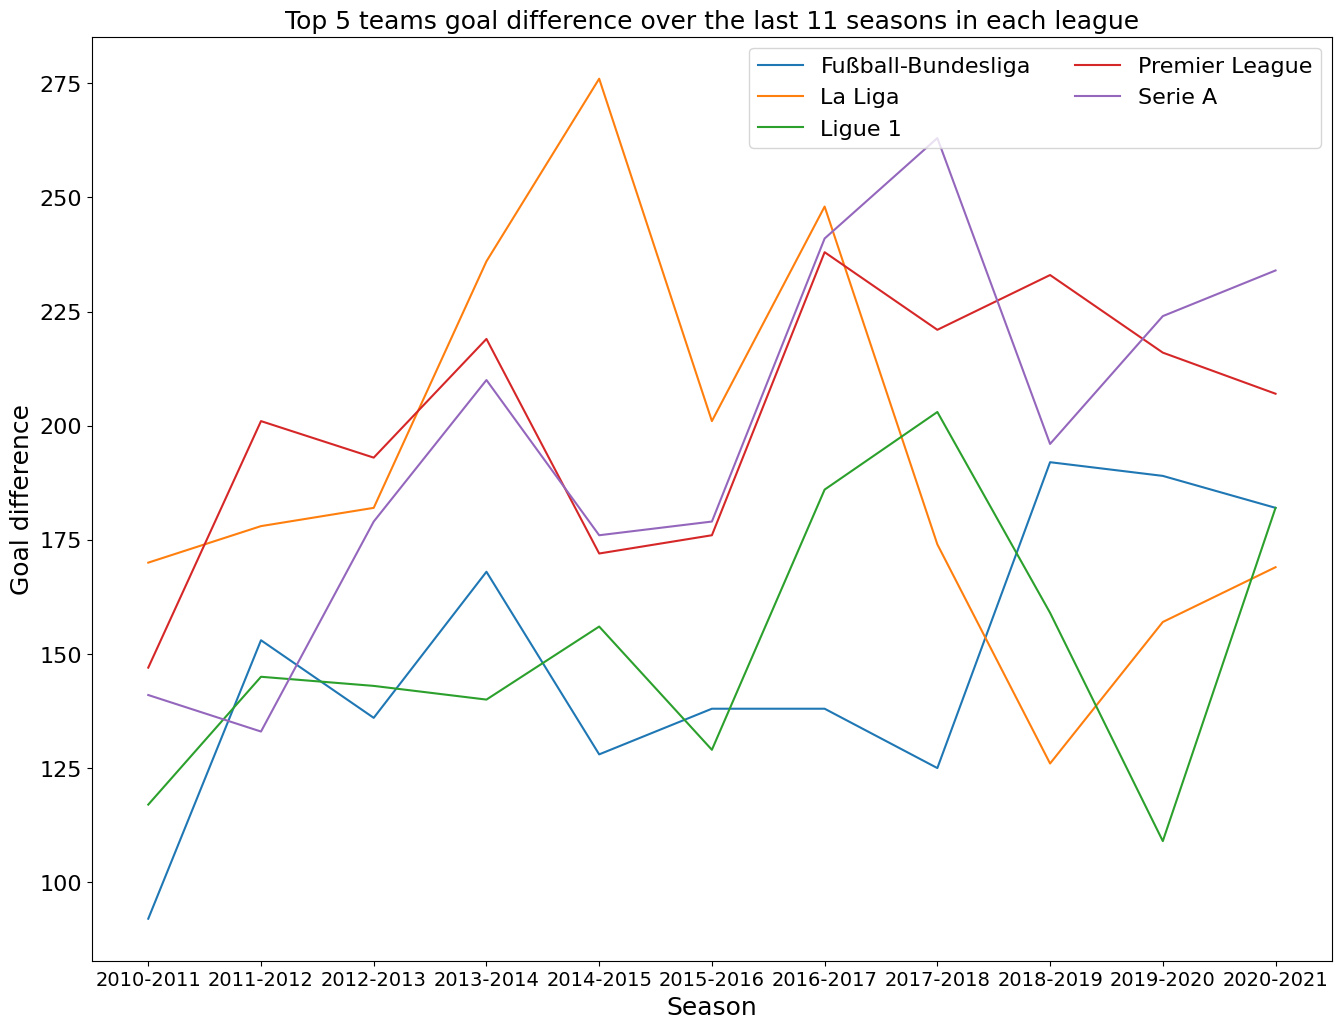

In [915]:
# graphs the goal difference for each club
plts.figure(figsize = (16,12))
plts.yticks(fontsize=16)

# labeling the graph
plts.title('Top 5 teams goal difference over the last 11 seasons in each league',fontsize=18)
plts.xlabel('Season',fontsize=18)
plts.ylabel('Goal difference',fontsize=18)

# gets all the unique leagues and iterates through the leagues and graphs the goal difference for each season in each league.
leagues = goal_dif['competition'].unique()
for league in leagues:
    plts.plot(goal_dif[goal_dif.competition==league].season, goal_dif[goal_dif.competition==league].goal_diff, label = league)

plts.legend(loc='upper right', ncol = 2, fontsize=16)


# Graph Analysis

The goal difference for the top 5 teams in each league can provide insight into the competitiveness of those leagues. For example, if the goal difference for the top 5 teams in a particular league is consistently low, it could indicate that the league is more competitive, as the teams are evenly matched and able to score and concede a similar number of goals. On the other hand, if the goal difference for the top 5 teams in a particular league is consistently high, it could suggest that the league is less competitive, as there is a larger gap between the top teams and the rest of the league. It's important to consider other factors in addition to goal difference, such as the number of teams in the league and the overall quality of play, to fully understand the competitiveness of a particular league. 

This graph shows that Ligue 1 and Bundesliga tend to be more competitive as they have the lowest goal difference for the top 10 teams consistently throughout the years.

# Winners of each league

## Premier League
For the five leagues, Premier League, Ligue 1, Bundesliga, La Liga, and Serie A, we will parse the data to get the teams that have won the league in each season over the past 11 seasons. We'll start by looking at the Premier League in England. 

In [916]:
premierLeagueWinners = list(topLeagues.loc[(topLeagues['competition'] == 'Premier League') & (topLeagues['rank'] == 1), 'squad'])
premierLeagueWinners = list(map(lambda x: x.replace('Manchester Utd', 'Man Utd'), premierLeagueWinners))

This is looking at the Premier League column and getting the teams that ranked first, which means they won the league in that particular season. It returns a list of teams that have won the Premier League in the last 10 seasons. We replace the name of one of the teams for visual reasons for when we do the bar graph. 

In [917]:
winCountsPerTeam = []
for team in premierLeagueWinners:
  winCountsPerTeam.append(premierLeagueWinners.count(team))


From the list of teams that Premier League each for a given season, we count how many times each team won the league over the past 11 seasons. After we know how many times each team has won the league, it's time to create a bar graph to visualize the distribution of wins among the league winners.

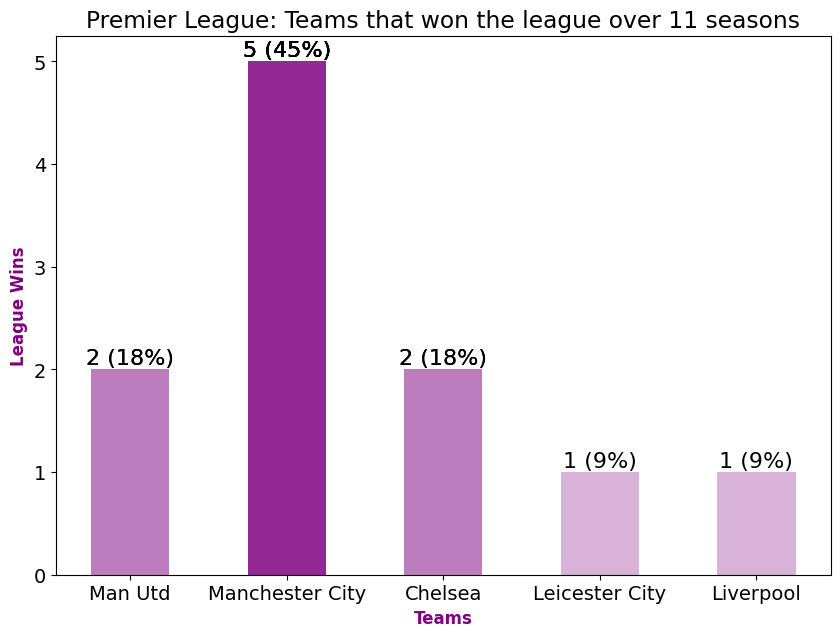

In [918]:
plts.figure(figsize=(10,7))
ax = plts.bar(premierLeagueWinners, winCountsPerTeam, color=['purple'], alpha=0.3, width=.5)
for p in ax.patches:
  percentage = str(round((p.get_height()/len(winCountsPerTeam))*100))
  plts.text(p.get_x() + p.get_width()/2, p.get_height()+.05, str(str(p.get_height())+" "+"("+percentage+"%)"), ha='center', fontsize=16)
plts.xlabel("Teams", fontweight='bold', fontsize='12', color='purple')
plts.ylabel("League Wins", fontweight='bold', fontsize='12', color='purple')
plts.title("Premier League: Teams that won the league over 11 seasons")
plts.show()

This bar graph shows the number of times each team has won the league in the Premier League in England. In the past 11 seasons, out of 20 teams, 5 different teams have won the league among themselves. Out of those 11 seasons, Manchester City won the league 5 times, almost winning the league half of the time. In the last 11 seasons, Manchester City has been dominant when it comes to the competition for first place. This goes to show how difficult it is for teams to be league winners and teams that don't have a history of winning are not likely to dethrone the teams with the exceptions being Leicester City and Liverpool, who are the only clubs up there with one league win.


We will continue to do this graph for the rest of the rest of the leagues, and we will see how dominant a few teams are in each league and whether there has been room for other teams to compete in the past 11 seasons.  

## Ligue 1
Next we will take a look at Ligue 1 from France. After getting the list of teams that have won the league, we will count how many times each team has won it and plot those numbers. 

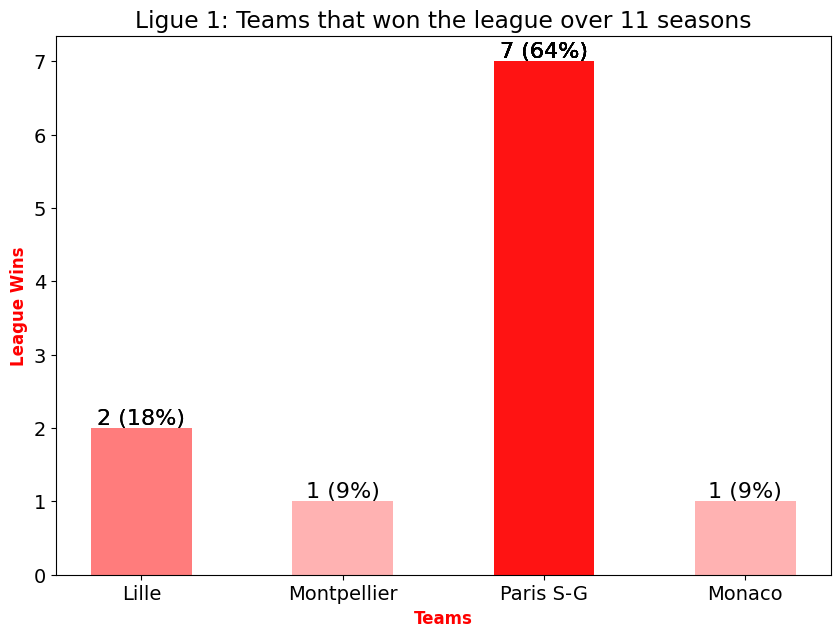

In [919]:
ligue1Winners = list(topLeagues.loc[(topLeagues['competition'] == 'Ligue 1') & (topLeagues['rank'] == 1), 'squad'])

winCountsPerTeam = []
for team in ligue1Winners:
  winCountsPerTeam.append(ligue1Winners.count(team))

plts.figure(figsize=(10,7))
ax = plts.bar(ligue1Winners, winCountsPerTeam, color=['red'], alpha=0.3, width=.5)
for p in ax.patches:
  percentage = str(round((p.get_height()/len(winCountsPerTeam))*100))
  plts.text(p.get_x() + p.get_width()/2, p.get_height()+.05, str(str(p.get_height())+" "+"("+percentage+"%)"), ha='center', fontsize=16)
plts.xlabel("Teams", fontweight='bold', fontsize='12', color='red')
plts.ylabel("League Wins", fontweight='bold', fontsize='12', color='red')
plts.title("Ligue 1: Teams that won the league over 11 seasons")
plts.show()

In Ligue 1, Paris Saint-Germain F.C. has won the league 7 times out of the past 11 seasons, winning the league more than half of the time. This is impressive but this data also says a lot about how dominant PSG F.C. has been in Ligue 1. The second team, Lille, has just 2 wins, showing how hard it has been for other teams to compete with the dominance of PSG. 

## Bundesliga
Next, we will look at the league wins for the German league, Bundesliga.

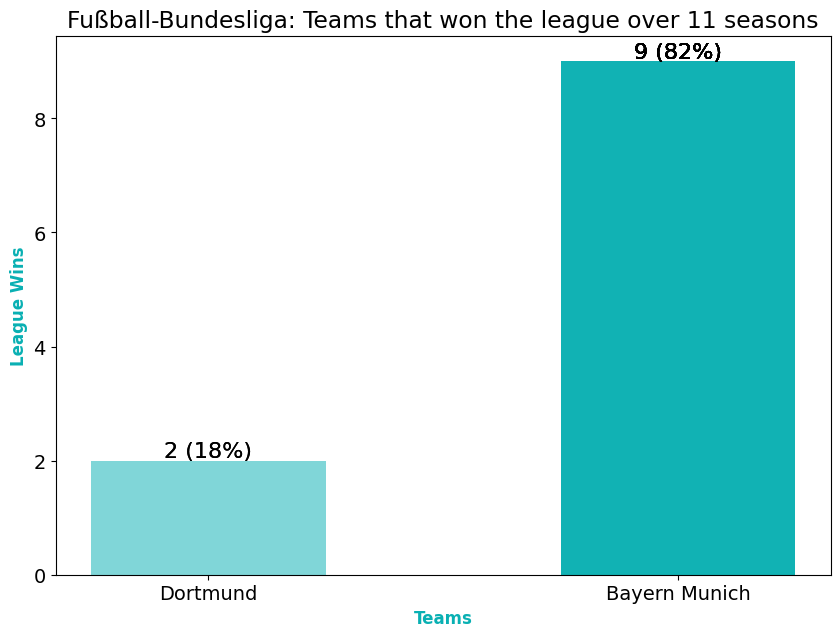

In [920]:
bundsligaWinners = list(topLeagues.loc[(topLeagues['competition'] == 'Fußball-Bundesliga') & (topLeagues['rank'] == 1), 'squad'])

winCountsPerTeam = []
for team in bundsligaWinners:
  winCountsPerTeam.append(bundsligaWinners.count(team))

plts.figure(figsize=(10,7))
ax = plts.bar(bundsligaWinners, winCountsPerTeam, color=['#09b0b3'], alpha=0.3, width=.5)
for p in ax.patches:
  percentage = str(round((p.get_height()/len(winCountsPerTeam))*100))
  plts.text(p.get_x() + p.get_width()/2, p.get_height()+.05, str(str(p.get_height())+" "+"("+percentage+"%)"), ha='center', fontsize=16)
plts.xlabel("Teams", fontweight='bold', fontsize='12', color='#09b0b3')
plts.ylabel("League Wins", fontweight='bold', fontsize='12', color='#09b0b3')
plts.title("Fußball-Bundesliga: Teams that won the league over 11 seasons")
plts.show()

In the past 11 seasons, Bayern Munich has been overwhelmingly dominant in the Bundesliga, winning the league 82% of the time. A team that comes close to competing is Dortmund, who has won it just 2 times. 

## La Liga
Next, we will take a look at La Liga from Spain. This league also has 20 teams that compete for the league each season. 

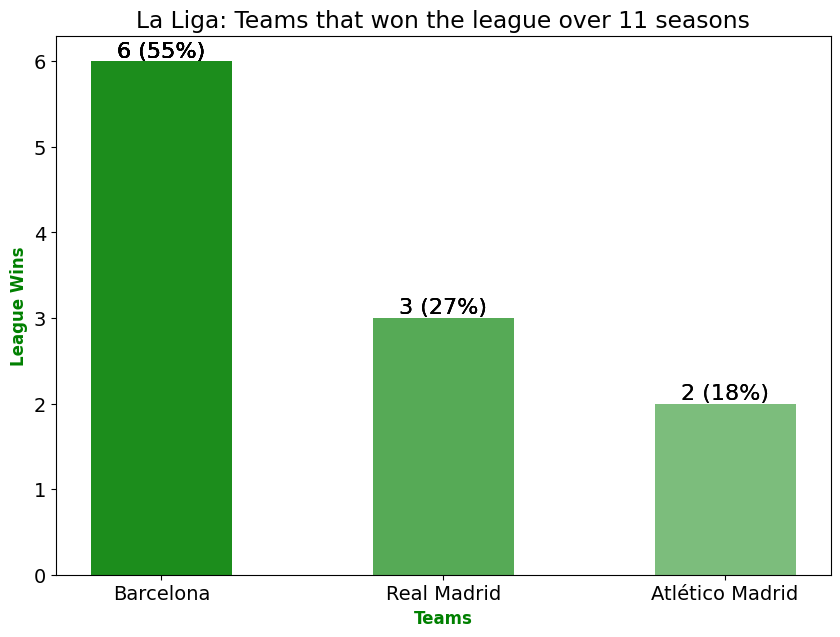

In [921]:

laLigaWinners = list(topLeagues.loc[(topLeagues['competition'] == 'La Liga') & (topLeagues['rank'] == 1), 'squad'])

winCountsPerTeam = []
for team in laLigaWinners:
  winCountsPerTeam.append(laLigaWinners.count(team))

plts.figure(figsize=(10,7))
ax = plts.bar(laLigaWinners, winCountsPerTeam, color=['green'], alpha=0.3, width=.5)
for p in ax.patches:
  percentage = str(round((p.get_height()/len(winCountsPerTeam))*100))
  plts.text(p.get_x() + p.get_width()/2, p.get_height()+.05, str(str(p.get_height())+" "+"("+percentage+"%)"), ha='center', fontsize=16)
plts.xlabel("Teams", fontweight='bold', fontsize='12', color='green')
plts.ylabel("League Wins", fontweight='bold', fontsize='12', color='green')
plts.title("La Liga: Teams that won the league over 11 seasons")
plts.show()



For La Liga, Barcelona has been on top in terms of league wins, winning the league half of the time in the past 11 seasons. The other wins have been shared with two teams, Real Madrid and Atletico Madrid. 

## Serie A
The last league we will look at Serie A from Italy. This league also consists of 20 teams that compete for the league. 

['AC Milan', 'Juventus', 'Juventus', 'Juventus', 'Juventus', 'Juventus', 'Juventus', 'Juventus', 'Juventus', 'Juventus', 'Inter']


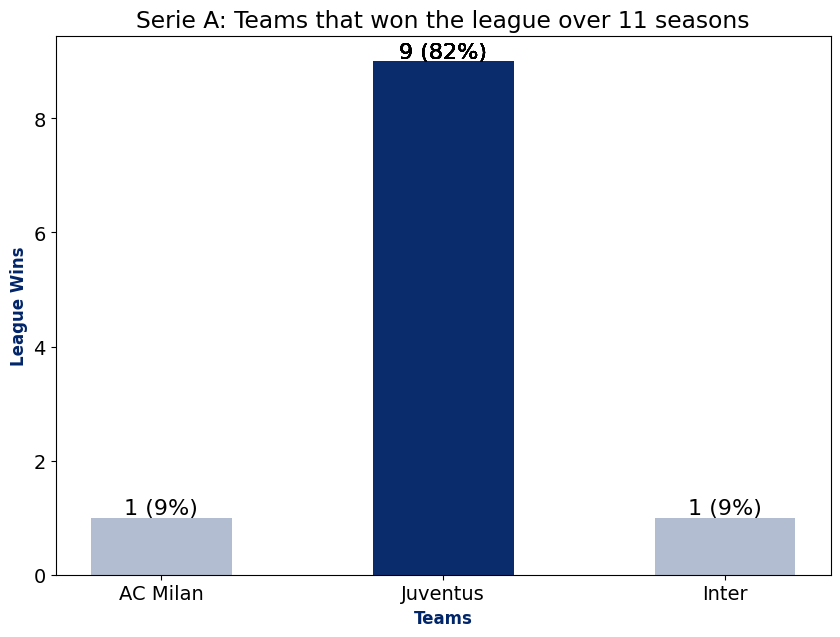

In [922]:
seriesAWinners = list(topLeagues.loc[(topLeagues['competition'] == 'Serie A') & (topLeagues['rank'] == 1), 'squad'])
seriesAWinners = list(map(lambda x: x.replace('Milan', 'AC Milan'), seriesAWinners))
print(seriesAWinners)
winCountsPerTeam = []
for team in seriesAWinners:
  winCountsPerTeam.append(seriesAWinners.count(team))

plts.figure(figsize=(10,7))
ax = plts.bar(seriesAWinners, winCountsPerTeam, color=['#012569'], alpha=0.3, width=.5)
for p in ax.patches:
  percentage = str(round((p.get_height()/len(winCountsPerTeam))*100))
  plts.text(p.get_x() + p.get_width()/2, p.get_height()+.05, str(str(p.get_height())+" "+"("+percentage+"%)"), ha='center', fontsize=16)
plts.xlabel("Teams", fontweight='bold', fontsize='12', color='#012569')
plts.ylabel("League Wins", fontweight='bold', fontsize='12', color='#012569')
plts.title("Serie A: Teams that won the league over 11 seasons")
plts.show()


Serie A is similar to the Bundesliga as Juventus has won the league more then 80% of the time similar to Bayern Munich. This shows Juventus dominance over the Serie A and how it has left little room for other teams to compete for the league. The other two wins are shared between Inter Milan and AC Milan in the past 11 seaons. 

# Analysis of the above plots
With how dominant PSG has been over Ligue 1, the league has left little room for competition from the other teams as the rest of the wins are shared with 3 other teams. Although 54% of the league wins have come from Manchester City, the other half of wins has been shared between 4 other teams. Bayern Munich won the Bundesliga 82% of the time, with only one team competing against them for the throne, leaving little room for competition from other teams. Bayern Munich dominance can be compared to Juventus from Serie A who have also won the league more than 80% of the time. 

# Points for all leagues
In fútbol, each team is given 3 points for a win, 1 point for a tie and 0 points for a loss. 

The next aspect of the 5 leagues we will look at is the standard deviation of the points per league in the past 11 seasons. 

In [923]:
allLeagues = topLeagues['competition'].unique()
pointsPerSeasonPerLeague = []
for league in allLeagues:
  pointsPerSeasonPerLeague.append(topLeagues.loc[topLeagues['competition'] == league, 'points'].std())


We are getting all the league names first and getting all the standard deviation using the points column from our dataframe, topLeagues. The loop is going to keep appending all the standard deviation of the points per league. 

Now that we have a list of of the standard deviation of points, we will graph to see how they compare to each other.

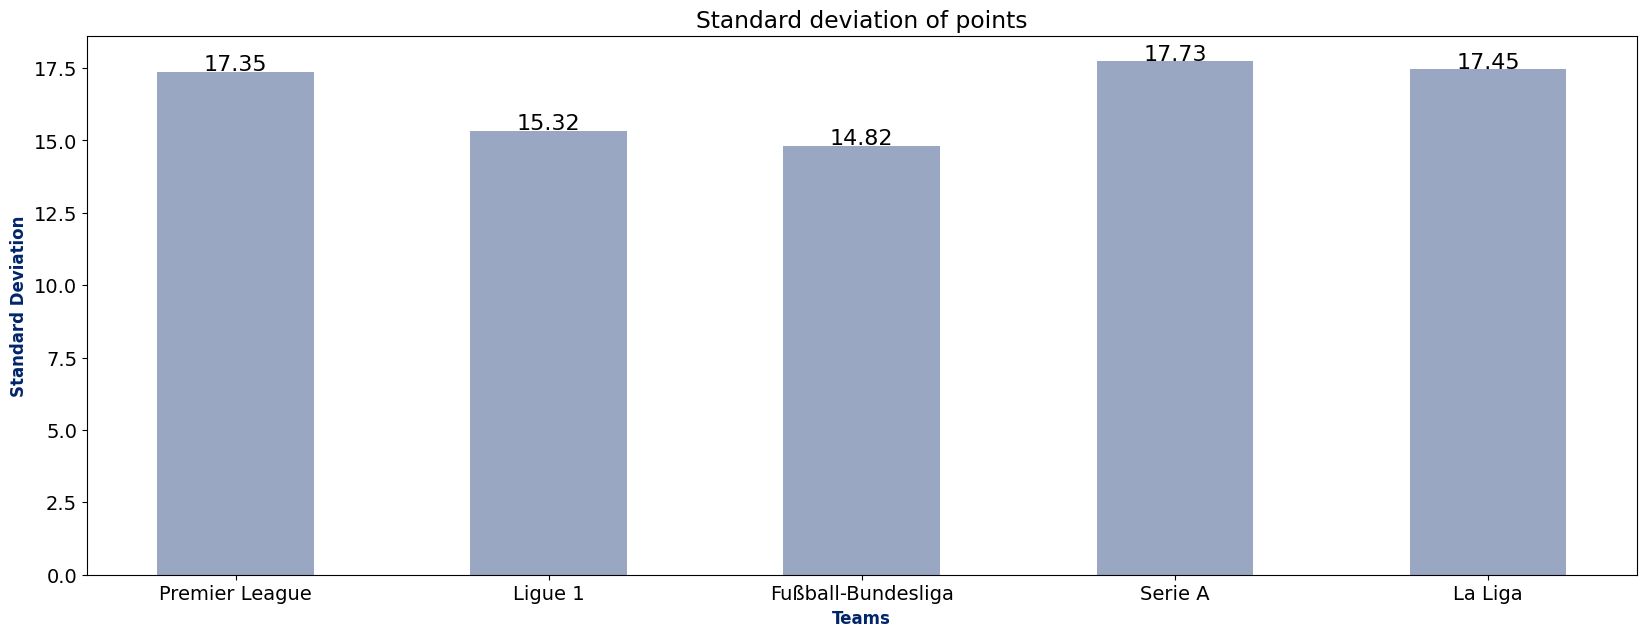

In [924]:
plts.figure(figsize=(20,7))
ax = plts.bar(allLeagues, pointsPerSeasonPerLeague, color=['#012569'], alpha=0.4, width=.5)
for p in ax.patches:
  percentage = str(round((p.get_height()/len(winCountsPerTeam))*100))
  plts.text(p.get_x() + p.get_width()/2, p.get_height()+.05, str(round(p.get_height(), 2)), ha='center', fontsize=16)

plts.xlabel("Teams", fontweight='bold', fontsize='12', color='#012569')
plts.ylabel("Standard Deviation", fontweight='bold', fontsize='12', color='#012569')
plts.title("Standard deviation of points")
plts.show()



By analyzing the standard deviation of total points per league, the point is to get an idea of how spead out the points are for the teams within the league. According to this plot, Bundesliga is on the lower end while the Premier League, Serie A, and La Liga have closer stardard deviation of points. The higher the standard deviation is, the bigger the spread of points is from the average points in a season. This reveals that leagues like the Premier League, Serie A, and La Liga have spread out set of points they accumulated per season. 

# Point difference for each league
Now that we have looked at how spread out the points are within each league, in order to keep analyzing how competitive each league is, we will look at how close the teams are at the top of each league. We will determine this by looking at the difference of points at the end of the season between the first and second place as well as between the fifth place team.

## Premier League
We will collect the necessary data for all leagues together. First we get all the seasons by using the 'unique' function that returns us all season dates. Now that we have all the seasons, we loop that list of seasons and each league to get the points of the first, second, and fifth place teams from the league for that specific season. We find the difference by subtracting by the first and second place as well as the fifth place. Then we add the particular season with the differences into a list. 


In [925]:
import matplotlib.pyplot as plts

allSeasons = topLeagues['season'].unique()
leagues = topLeagues['competition'].unique()

premierLDiff = []
laLigaDiff = []
ligue1Diff = []
serieADiff = []
bundesligaDiff = []

perSeasonDiffList = []
for season in allSeasons:
    for league in leagues:
        firstPlacePoints = list(topLeagues.loc[(topLeagues['competition'] == league) & (topLeagues['rank'] == 1) & (topLeagues['season'] == season), 'points'])
        secondPlacePoints = list(topLeagues.loc[(topLeagues['competition'] == league) & (topLeagues['rank'] == 2) & (topLeagues['season'] == season), 'points'])
        fifthPlacePoints = list(topLeagues.loc[(topLeagues['competition'] == league) & (topLeagues['rank'] == 5) & (topLeagues['season'] == season), 'points'])

        diffBtwnFirstSecond = firstPlacePoints[0] - secondPlacePoints[0]
        diffBtwnFirstFifth = firstPlacePoints[0] - fifthPlacePoints[0]
        if league == 'Premier League':
            premierLDiff.append([league, season, diffBtwnFirstSecond, diffBtwnFirstFifth])
        elif league == 'La Liga':
            laLigaDiff.append([season, diffBtwnFirstSecond, diffBtwnFirstFifth])
        elif league == 'Ligue 1':
            ligue1Diff.append([season, diffBtwnFirstSecond, diffBtwnFirstFifth])
        elif league == 'Serie A':
            serieADiff.append([season, diffBtwnFirstSecond, diffBtwnFirstFifth])
        elif league == 'Fußball-Bundesliga':
            bundesligaDiff.append([season, diffBtwnFirstSecond, diffBtwnFirstFifth])


Next we will create a bar plot that has one bar for the point difference between first and second and for the difference between first and fifth place. This will help to visualize the difference when the first place team season points are compared to second and fifth place. 

We begin by creating a data frame for each league that has the columns: league name, season, point difference for top 2, and point difference between first and fifth. Then, we graph each league in a loop.  

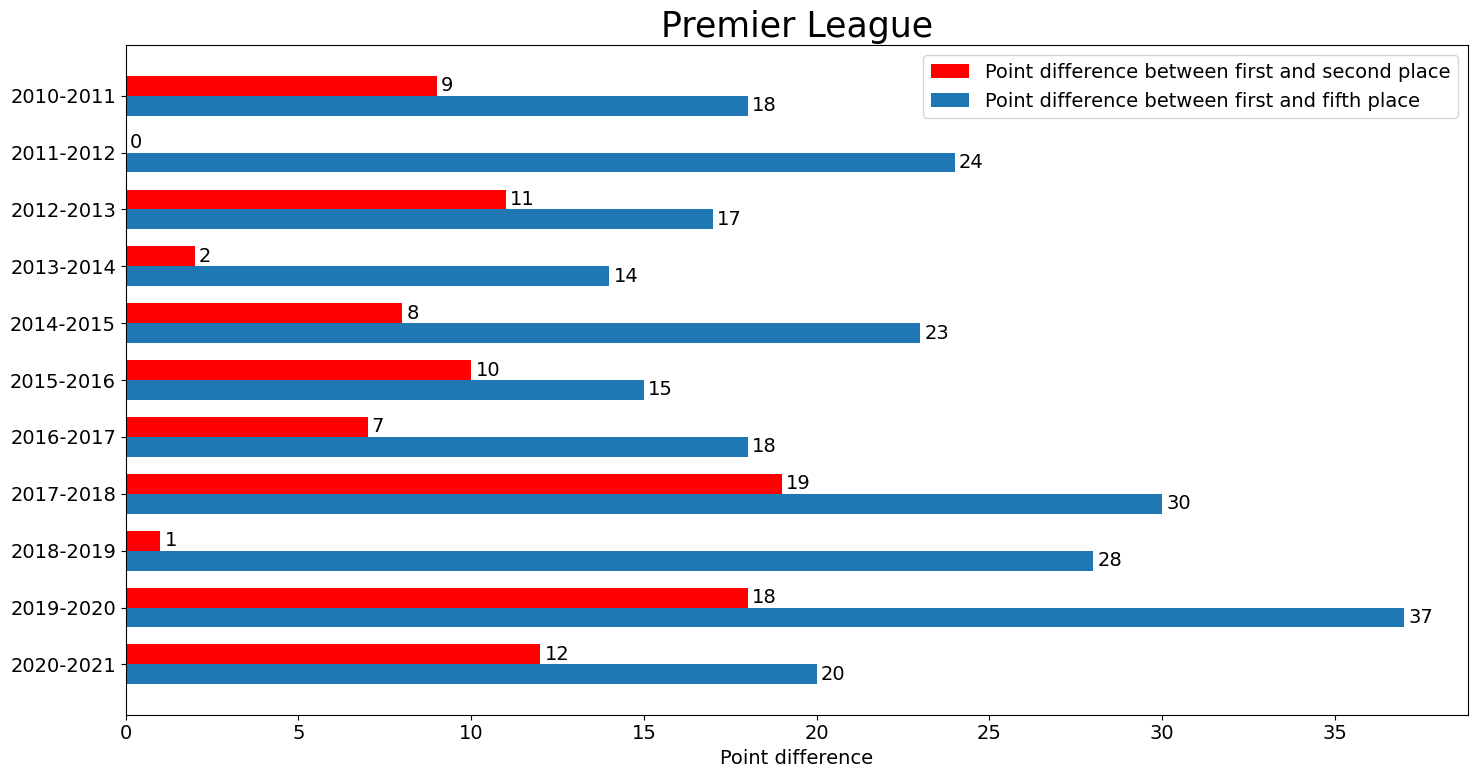

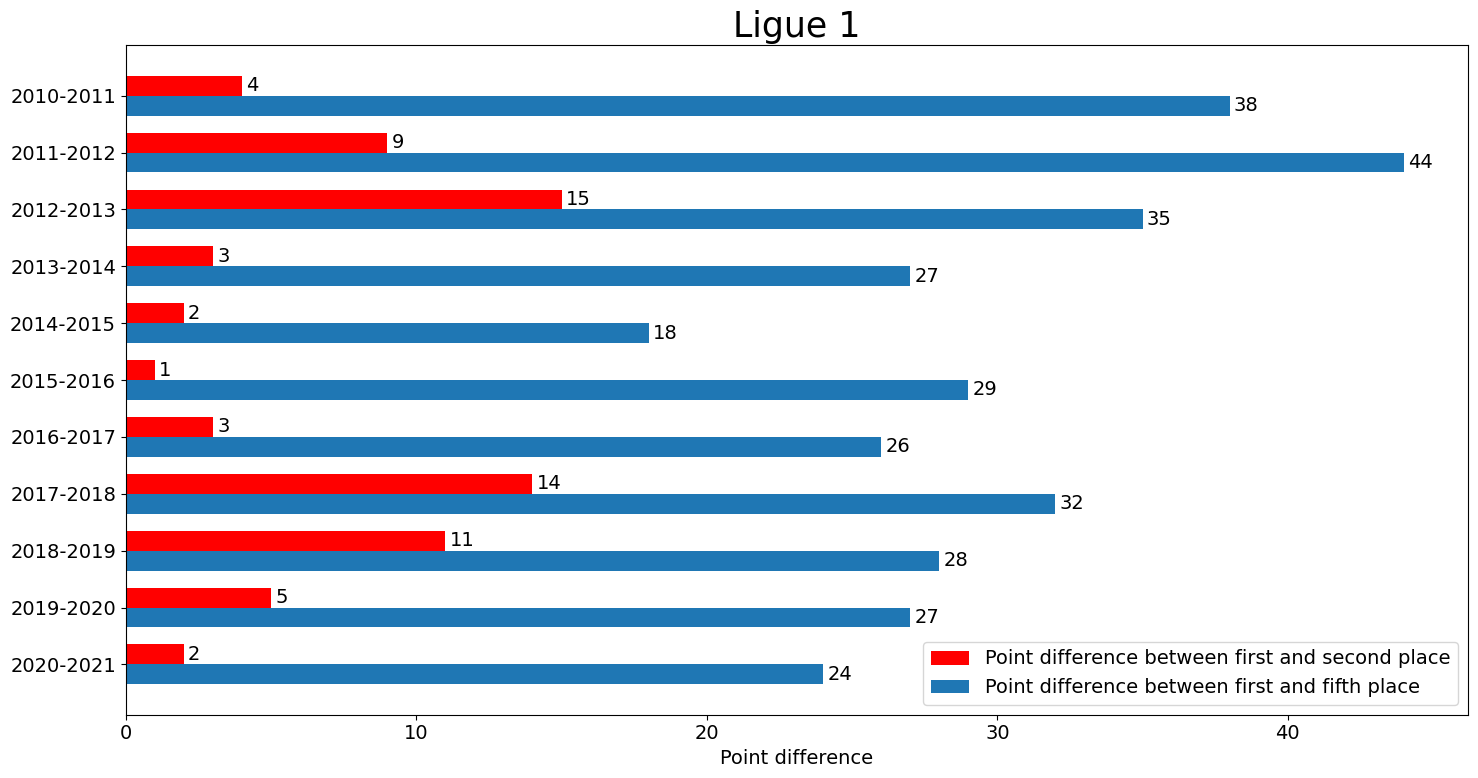

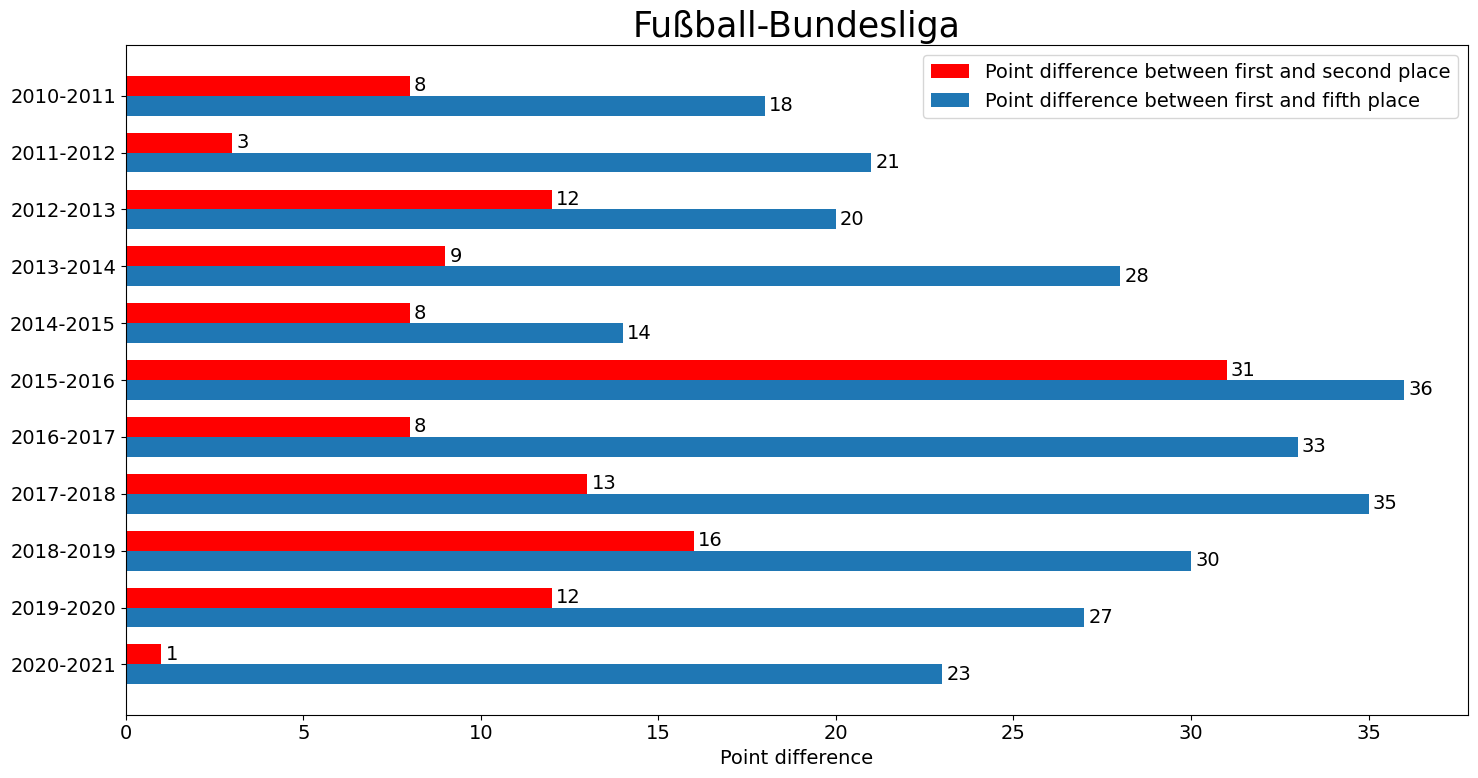

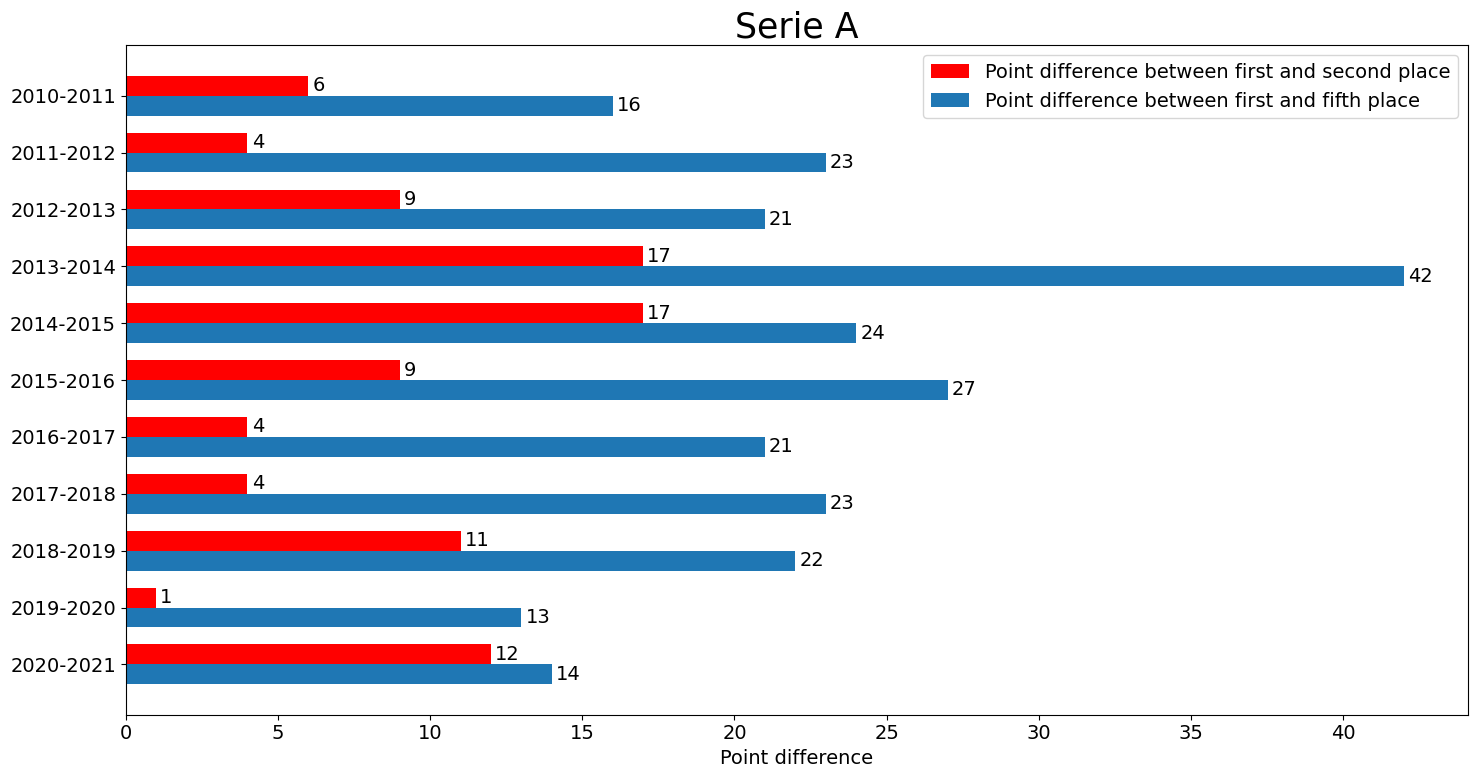

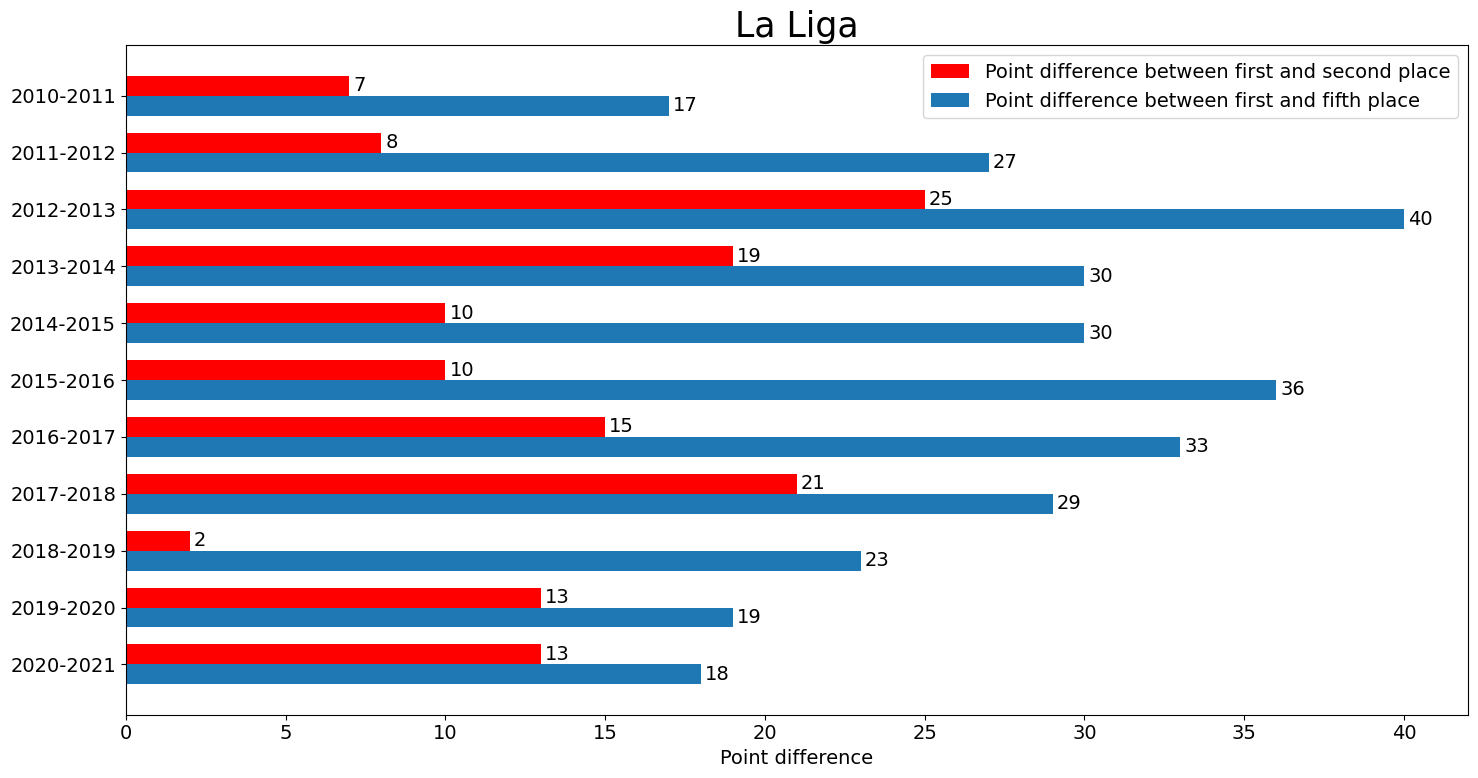

In [926]:

premierLDiff = pd.DataFrame(premierLDiff, columns=['League','Season', 'First', 'Fifth'])
laLigaDiff = pd.DataFrame(laLigaDiff, columns=['Season', 'First', 'Fifth'])
ligue1Diff = pd.DataFrame(ligue1Diff, columns=['Season', 'First', 'Fifth'])
serieADiff = pd.DataFrame(serieADiff, columns=['Season', 'First', 'Fifth'])
bundesligaDiff = pd.DataFrame(bundesligaDiff, columns=['Season', 'First', 'Fifth'])

listOfNames = [premierLDiff, laLigaDiff, ligue1Diff, serieADiff, bundesligaDiff]


for i, df in enumerate(listOfNames):
  y = np.arange(len(df['Season']))  
  width = 0.35  
  fig, ax = plts.subplots()

  fig.set_figwidth(15)
  fig.set_figheight(8)

  rects1 = ax.barh(y - width/2, df['First'], width, label='Point difference between first and second place', color='red')
  rects2 = ax.barh(y + width/2, df['Fifth'], width, label='Point difference between first and fifth place')

  ax.set_xlabel('Point difference')
  ax.set_title(leagues[i], fontsize='25')
  ax.set_yticks(y, df['Season'])
  ax.legend()

  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)

  ax.set_xlim(ax.get_xlim())
  ax.invert_yaxis()

  fig.tight_layout()

  plts.show()


The above bar plots show us a breakdown of the point differences and we can see a trend of the difference between first and second place being low and first and fifth being bigger. But to get an idea of the overall trend for all the leagues, we will find the average point difference below.

In [927]:
avePoint = []
avePointfifth = []

diffDF = pd.DataFrame(premierLDiff, columns=['Season', 'First', 'Fifth'])
aveDif = round(diffDF['First'].mean(),2)
avePoint.append(aveDif)
aveDif = round(diffDF['Fifth'].mean(),2)
avePointfifth.append(aveDif)

diffDF = pd.DataFrame(laLigaDiff, columns=['Season', 'First', 'Fifth'])
aveDif = round(diffDF['First'].mean(),2)
avePoint.append(aveDif)
aveDif = round(diffDF['Fifth'].mean(),2)
avePointfifth.append(aveDif)

diffDF = pd.DataFrame(bundesligaDiff, columns=['Season', 'First', 'Fifth'])
aveDif = round(diffDF['First'].mean(),2)
avePoint.append(aveDif)
aveDif = round(diffDF['Fifth'].mean(),2)
avePointfifth.append(aveDif)


diffDF = pd.DataFrame(ligue1Diff, columns=['Season', 'First', 'Fifth'])
aveDif = round(diffDF['First'].mean(),2)
avePoint.append(aveDif)
aveDif = round(diffDF['Fifth'].mean(),2)
avePointfifth.append(aveDif)


diffDF = pd.DataFrame(serieADiff, columns=['Season', 'First', 'Fifth'])
aveDif = round(diffDF['First'].mean(),2)
avePoint.append(aveDif)
aveDif = round(diffDF['Fifth'].mean(),2)
avePointfifth.append(aveDif)

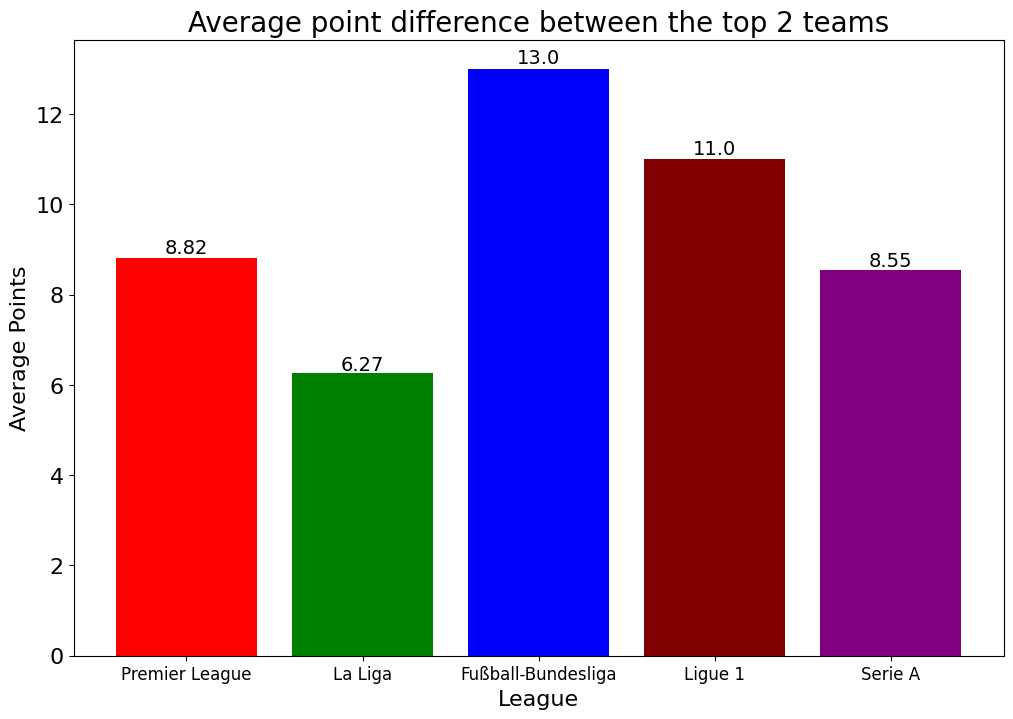

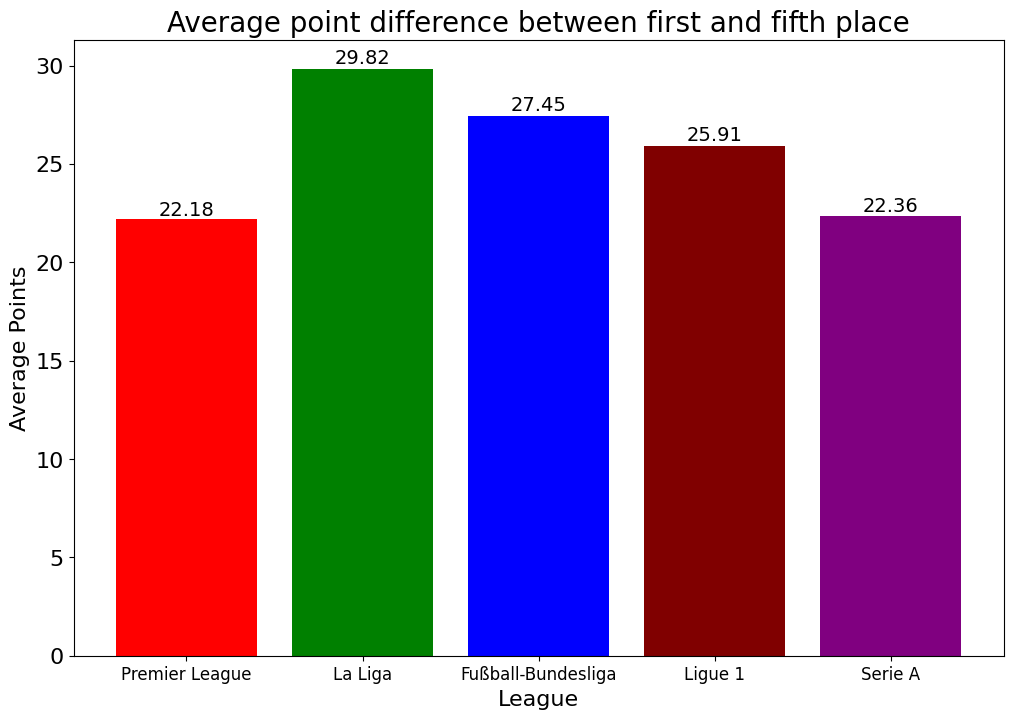

In [928]:
both = []
both.append(avePoint)
both.append(avePointfifth)
# print(both)
for i, lst in enumerate(both):
    leagues = ['Premier League','La Liga', 'Fußball-Bundesliga', 'Ligue 1', 'Serie A']
    plts.figure(figsize=(12, 8))
    colors = ['red', 'green', 'blue', 'maroon', 'purple']
    bar = plts.bar(leagues, lst, color = colors)
    plts.yticks(fontsize=16)
    plts.xticks(fontsize=12)

    for p in bar.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        plts.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')

    plts.xlabel('League', fontsize = 16)
    plts.ylabel('Average Points', fontsize = 16)
    if i == 0:
        plts.title('Average point difference between the top 2 teams', fontsize = 20)
    else:
        plts.title('Average point difference between first and fifth place', fontsize = 20)

# Analysis
The bar graphs show that La Liga, Serie A, and the Premier League are the most competitive leagues based on the average point difference between the top two teams. La Liga has the lowest average point difference, but the highest average point difference between the first and fifth teams, suggesting that the competition is only strong among the top three teams. On the other hand, both the Premier League and Serie A have low average point differences between the first and fifth teams, indicating that the competition is strong throughout the league.